## The simple example demonstration

### Radiomics Analysis for Prediction of EGFR Mutations and Ki-67 Proliferation Index in Patients with NSCLC

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings('ignore')

D:\Python3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
D:\Python3\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
D:\Python3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
D:\Python3\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


## EGFR Prediction

In [2]:
df = pd.read_csv('./EGFR-radiomics.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 11 columns):
EGFR                                                87 non-null int64
wavelet-HLL_glcm_MaximumProbability                 87 non-null float64
wavelet-LLL_glcm_MaximumProbability                 87 non-null float64
original_glcm_SumEntropy                            87 non-null float64
log-sigma-1-0-mm-3D_glcm_MaximumProbability         87 non-null float64
wavelet-LHL_firstorder_Kurtosis                     87 non-null float64
wavelet-LLL_firstorder_Skewness                     87 non-null float64
log-sigma-2-0-mm-3D_firstorder_Kurtosis             87 non-null float64
original_shape_Sphericity                           87 non-null float64
wavelet-LHL_glszm_LargeAreaHighGrayLevelEmphasis    87 non-null float64
original_glcm_ClusterTendency                       87 non-null float64
dtypes: float64(10), int64(1)
memory usage: 7.6 KB


In [3]:
df.head()

,EGFR,wavelet-HLL_glcm_MaximumProbability,wavelet-LLL_glcm_MaximumProbability,original_glcm_SumEntropy,log-sigma-1-0-mm-3D_glcm_MaximumProbability,wavelet-LHL_firstorder_Kurtosis,wavelet-LLL_firstorder_Skewness,log-sigma-2-0-mm-3D_firstorder_Kurtosis,original_shape_Sphericity,wavelet-LHL_glszm_LargeAreaHighGrayLevelEmphasis,original_glcm_ClusterTendency
0,1,0.007927,0.003456,6.124576,0.019309,5.800779,0.239530,2.254404,0.620527,2465.281536,411.620729
1,0,0.012674,0.006008,5.948736,0.031240,2.795991,0.466490,2.382641,0.689155,1824.505051,355.638540
2,1,0.015902,0.008222,4.920900,0.040681,3.766194,0.403203,3.441538,0.631141,2935.840909,66.400015
3,0,0.032583,0.016863,5.066296,0.086125,7.706288,-1.581500,3.865254,0.552905,765983.082600,146.881644
4,1,0.015743,0.008266,5.424894,0.021068,3.593316,0.383414,2.323130,0.678834,1008.337079,174.982589


In [4]:
df_drop = df.dropna(axis=0)
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 0 to 86
Data columns (total 11 columns):
EGFR                                                87 non-null int64
wavelet-HLL_glcm_MaximumProbability                 87 non-null float64
wavelet-LLL_glcm_MaximumProbability                 87 non-null float64
original_glcm_SumEntropy                            87 non-null float64
log-sigma-1-0-mm-3D_glcm_MaximumProbability         87 non-null float64
wavelet-LHL_firstorder_Kurtosis                     87 non-null float64
wavelet-LLL_firstorder_Skewness                     87 non-null float64
log-sigma-2-0-mm-3D_firstorder_Kurtosis             87 non-null float64
original_shape_Sphericity                           87 non-null float64
wavelet-LHL_glszm_LargeAreaHighGrayLevelEmphasis    87 non-null float64
original_glcm_ClusterTendency                       87 non-null float64
dtypes: float64(10), int64(1)
memory usage: 8.2 KB


In [5]:
df_drop.head()

,EGFR,wavelet-HLL_glcm_MaximumProbability,wavelet-LLL_glcm_MaximumProbability,original_glcm_SumEntropy,log-sigma-1-0-mm-3D_glcm_MaximumProbability,wavelet-LHL_firstorder_Kurtosis,wavelet-LLL_firstorder_Skewness,log-sigma-2-0-mm-3D_firstorder_Kurtosis,original_shape_Sphericity,wavelet-LHL_glszm_LargeAreaHighGrayLevelEmphasis,original_glcm_ClusterTendency
0,1,0.007927,0.003456,6.124576,0.019309,5.800779,0.239530,2.254404,0.620527,2465.281536,411.620729
1,0,0.012674,0.006008,5.948736,0.031240,2.795991,0.466490,2.382641,0.689155,1824.505051,355.638540
2,1,0.015902,0.008222,4.920900,0.040681,3.766194,0.403203,3.441538,0.631141,2935.840909,66.400015
3,0,0.032583,0.016863,5.066296,0.086125,7.706288,-1.581500,3.865254,0.552905,765983.082600,146.881644
4,1,0.015743,0.008266,5.424894,0.021068,3.593316,0.383414,2.323130,0.678834,1008.337079,174.982589


In [6]:
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['EGFR']))}
class_mapping

{0: 0, 1: 1}

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize

df['EGFR'] = df['EGFR'].map(class_mapping)
y = LabelEncoder().fit_transform(df['EGFR'].values)
X = df.iloc[:,1:11].values
print(y.shape)
print(X.shape)

(87,)
(87, 10)


In [8]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_std = std.fit_transform(X)
print(X_std.shape)

(87, 10)


In [9]:
def Find_Optimal_Cutoff(TPR, FPR, threshold):
    y = TPR - FPR
    Youden_index = np.argmax(y)  # Only the first occurrence is returned.
    optimal_threshold = threshold[Youden_index]
    point = [FPR[Youden_index], TPR[Youden_index]]
    return optimal_threshold, point

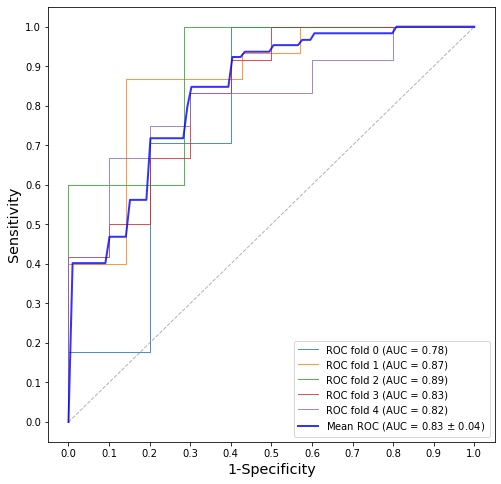

In [18]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import model_selection
from scipy import interp
import matplotlib
clf = LogisticRegression(penalty='l2',C=1, multi_class='auto',solver='liblinear',random_state=1)
cv = model_selection.ShuffleSplit(n_splits = 5, test_size = 0.25, random_state = 0)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 1.1, step=0.1))
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)

for train, test in cv.split(X_std, y):
    probas_ = clf.fit(X_std[train], y[train]).predict_proba(X_std[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    optimal_th, optimal_point = Find_Optimal_Cutoff(TPR=tpr, FPR=fpr, threshold=thresholds) ### can be annotated
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.8,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1

plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=.6)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
#optimal_th, optimal_point = Find_Optimal_Cutoff(TPR=mean_tpr, mean_fpr, threshold=thresholds)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2, alpha=.8)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
#plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')
#plt.xlim([-0, 1])
#plt.ylim([-0, 1])
plt.xlabel('1-Specificity', fontsize = 'x-large')
plt.ylabel('Sensitivity', fontsize = 'x-large')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right" ,
           fontsize = 'medium'
          )
#plt.plot(optimal_point[0], optimal_point[1], marker='o', color='r')
#plt.text(optimal_point[0], optimal_point[1], f'Threshold:{optimal_th:.2f}')

plt.savefig('EGFR-ROC1.jpg',dpi=1500)
plt.show()

In [28]:
df_test = pd.read_csv('./EGFR-test.csv')
df_test_drop = df_test.dropna(axis=0)
class_mapping = {label: idx for idx, label in enumerate(np.unique(df_test_drop['EGFR']))}
df_test_drop['EGFR'] = df_test_drop['EGFR'].map(class_mapping)
y_test = LabelEncoder().fit_transform(df_test_drop['EGFR'].values)
X_test = df_test_drop.iloc[:,1:11].values

X_test_std = std.fit_transform(X_test)
print(X_test_std.shape)
print(y_test.shape)

(45, 10)
(45,)


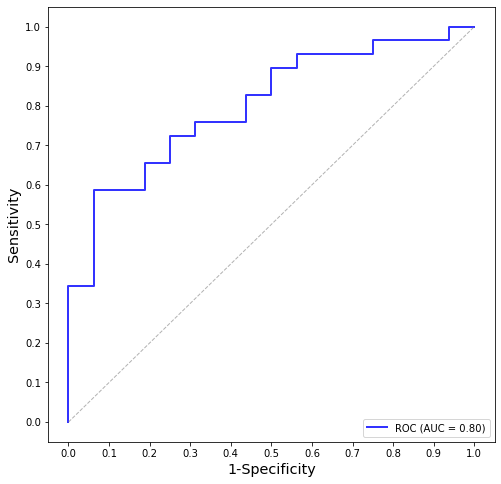

In [35]:
from matplotlib import style
tprs = []
aucs = []
i = 0
lw = 2
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 1.1, step=0.1))

probas_ = clf.predict_proba(X_test_std)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
optimal_th, optimal_point = Find_Optimal_Cutoff(TPR=tpr, FPR=fpr, threshold=thresholds)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='b', alpha=.8, lw=lw, label='ROC (AUC = %0.2f)' % roc_auc) 
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--',alpha=.6)
#plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')
#plt.xlim([-0, 1])
#plt.ylim([-0, 1])
#plt.plot(optimal_point[0], optimal_point[1], marker='o', color='r')
#plt.text(optimal_point[0], optimal_point[1], f'{optimal_th:.2f}', verticalalignment="bottom", horizontalalignment="center")
#print (optimal_point[0], optimal_point[1])

plt.xlabel('1-Specificity', fontsize = 'x-large')
plt.ylabel('Sensitivity', fontsize = 'x-large')
plt.legend(loc="lower right", fontsize = 'medium')
plt.savefig('EGFR-ROC2.jpg',dpi=1500)
plt.show()

In [36]:
clf.coef_

array([[-0.26637586, -0.36415474,  0.88922437,  0.35225551, -0.63638105,
         0.3393241 ,  0.87795737, -0.30623909, -0.59557871, -0.26788923]])

## Ki-67 Prediction

In [37]:
df1 = pd.read_csv('./Ki67-radiomics.csv', encoding = 'gb2312')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 29 columns):
Y                                                             87 non-null int64
wavelet-HLL_gldm_LargeDependenceHighGrayLevelEmphasis         87 non-null float64
log-sigma-1-0-mm-3D_glszm_SmallAreaLowGrayLevelEmphasis       87 non-null float64
log-sigma-5-0-mm-3D_glcm_Idm                                  87 non-null float64
log-sigma-5-0-mm-3D_glcm_InverseVariance                      87 non-null float64
original_firstorder_Median                                    87 non-null float64
log-sigma-2-0-mm-3D_glszm_SmallAreaLowGrayLevelEmphasis       87 non-null float64
wavelet-LHL_glszm_LargeAreaLowGrayLevelEmphasis               87 non-null float64
wavelet-LHL_firstorder_Maximum                                87 non-null float64
wavelet-HLL_glszm_GrayLevelNonUniformityNormalized            87 non-null float64
log-sigma-3-0-mm-3D_firstorder_Median                         87 non-null float

In [38]:
class_mapping1 = {label: idx for idx, label in enumerate(np.unique(df1['Y']))}
class_mapping1

{0: 0, 1: 1}

In [39]:
df1_drop = df1.dropna(axis=0)
df1_drop['Y'] = df1_drop['Y'].map(class_mapping1)
y1 = LabelEncoder().fit_transform(df1_drop['Y'].values)
X1 = df1_drop.iloc[:,1:29].values
print(y1.shape)
print(X1.shape)
X1_std = std.fit_transform(X1)
print(X1_std.shape)

(87,)
(87, 28)
(87, 28)


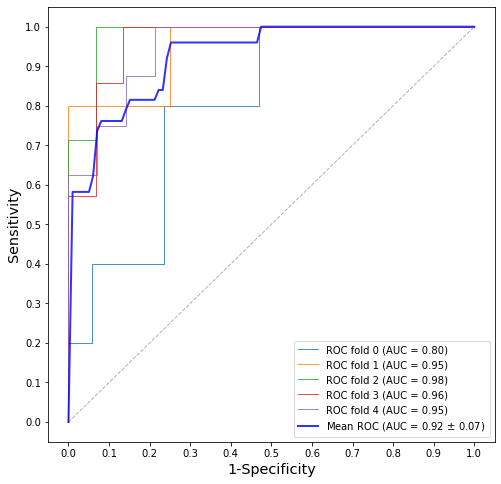

In [43]:
clf1 = LogisticRegression(penalty='l2',C=1, multi_class='auto',solver='liblinear',random_state=1)

cv = model_selection.ShuffleSplit(n_splits = 5, test_size = 0.25, random_state = 0)
#classifier = clf1
#cv = model_selection.StratifiedKFold(n_splits=5)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 1.1, step=0.1))

for train, test in cv.split(X1_std, y1):
    probas_ = clf1.fit(X1_std[train], y1[train]).predict_proba(X1_std[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y1[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    optimal_th, optimal_point = Find_Optimal_Cutoff(TPR=tpr, FPR=fpr, threshold=thresholds) ###
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.8,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=.6)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
#optimal_th, optimal_point = Find_Optimal_Cutoff(TPR=mean_tpr, mean_fpr, threshold=thresholds)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2, alpha=.8)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
#plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')
#plt.xlim([-0, 1])
#plt.ylim([-0, 1])
plt.xlabel('1-Specificity', fontsize = 'x-large')
plt.ylabel('Sensitivity', fontsize = 'x-large')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right" ,
           fontsize = 'medium'
          )
#plt.plot(optimal_point[0], optimal_point[1], marker='o', color='r')
#plt.text(optimal_point[0], optimal_point[1], f'Threshold:{optimal_th:.2f}')

plt.savefig('Ki-67-ROC1.jpg',dpi=1500)
plt.show()

In [44]:
df1_test = pd.read_csv('./Ki67-test.csv')
df1_test_drop = df1_test.dropna(axis=0)
class_mapping1 = {label: idx for idx, label in enumerate(np.unique(df1_test_drop['Ki-67']))}
df1_test_drop['Ki-67'] = df1_test_drop['Ki-67'].map(class_mapping1)
y1_test = LabelEncoder().fit_transform(df1_test_drop['Ki-67'].values)
X1_test = df1_test_drop.iloc[:,1:29].values

X1_test_std = std.fit_transform(X1_test)
print(X1_test_std.shape)
print(y1_test.shape)

(45, 28)
(45,)


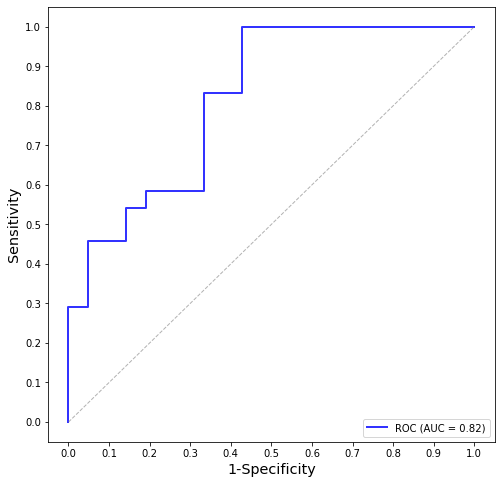

In [46]:
from matplotlib import style
tprs = []
aucs = []
i = 0
lw = 2
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 1.1, step=0.1))

probas_ = clf1.predict_proba(X1_test_std)
fpr, tpr, thresholds = roc_curve(y1_test, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
optimal_th, optimal_point = Find_Optimal_Cutoff(TPR=tpr, FPR=fpr, threshold=thresholds)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='b', alpha=.8, lw=lw, label='ROC (AUC = %0.2f)' % roc_auc) 
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--',alpha=.6)
#plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')
#plt.xlim([-0, 1])
#plt.ylim([-0, 1])
#plt.plot(optimal_point[0], optimal_point[1], marker='o', color='r')
#plt.text(optimal_point[0], optimal_point[1], f'{optimal_th:.2f}', verticalalignment="bottom", horizontalalignment="center")
#print (optimal_point[0], optimal_point[1])
plt.xlabel('1-Specificity', fontsize = 'x-large')
plt.ylabel('Sensitivity', fontsize = 'x-large')
plt.legend(loc="lower right" ,
           fontsize = 'medium'
          )
plt.savefig('Ki-67-ROC2.jpg',dpi=1500)
plt.show()

In [48]:
clf1.coef_

array([[-0.33933662, -0.24501119,  0.06149887,  0.66555733,  0.5809558 ,
         0.41924958,  0.23932351,  0.77765524, -0.08881509, -0.63052453,
        -0.57778378,  0.14979279, -0.19062698,  0.08261748,  0.48340228,
         0.68332893,  0.6523309 ,  0.16729185, -0.24171584, -0.02439305,
         0.29861927, -0.29627875,  0.41290256,  0.78760983, -0.56817862,
         0.38850808, -0.18475777, -0.08823505]])